# Sentinel-5P

* **Products used:** 
[s5p_tropomi_l2_aer_ai](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_aer_ai)
[s5p_tropomi_l2_ch4](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_ch4)
[s5p_tropomi_l2_cloud](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_cloud)
[s5p_tropomi_l2_co](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_co)
[s5p_tropomi_l2_hcho](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_hcho)
[s5p_tropomi_l2_no2](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_no2)
[s5p_tropomi_l2_o3](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_o3)
[s5p_tropomi_l2_so2](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_so2)

## Background

Sentinel-5P is an Earth observation satellite launched in 2017 and operated by the European Space Agency under the Copernicus Programme. It was developed as a precursor mission to the future Sentinel-5 mission to ensure continuity of atmospheric observations following earlier European missions.

The core objective of Sentinel-5P is to provide near-real-time, global measurements of atmospheric composition and air quality. Its data support scientific research, environmental monitoring, and policy implementation related to air pollution, climate change, ozone layer depletion, and human health. The mission produces high-resolution datasets that allow scientists to track pollutants and trace gases spatially and temporally across the globe.

Sentinel-5P carries a single instrument—the TROPOMI (Tropospheric Monitoring Instrument)—which measures solar radiation reflected from the Earth’s atmosphere and surface across ultraviolet, visible, near-infrared, and shortwave infrared spectral bands. From these measurements, concentration values for various trace gases and aerosol properties are retrieved. Compared to previous instruments, TROPOMI offers unprecedented spatial resolution, enabling detection of emission sources such as urban pollution, biomass burning, and industrial activities.

Level-2 products are geophysical datasets derived from measured radiances and converted into physically meaningful variables such as gas concentrations and aerosol properties. Each product addresses a specific atmospheric component relevant to air quality, weather, and climate processes.

### Sentinel-5P TROPOMI Level-2 Products and Their Functions

1. **UV Aerosol Index (UVAI)** detects the presence of light-absorbing aerosol particles such as smoke, dust, and volcanic ash in the atmosphere, helping to monitor air pollution and transboundary aerosol transport.

2. **Methane (CH₄) total column** measures the vertically integrated concentration of methane in the atmosphere and is used to identify major greenhouse gas emission sources and support climate change research.

3. **Cloud fraction** quantifies the proportion of each satellite pixel covered by clouds, which is essential for correcting trace-gas retrievals and analyzing cloud coverage patterns.

4. **Cloud albedo** represents how much sunlight is reflected by clouds and helps assess their cooling or warming effect on the Earth’s climate system.

5. **Cloud top pressure** indicates cloud height and is used to study atmospheric structure, weather systems, and radiative impacts of clouds.

6. **Carbon Monoxide (CO) total column** measures atmospheric CO concentration, serving as an indicator of combustion processes such as biomass burning, industrial activity, and traffic emissions.

7. **Formaldehyde (HCHO) total column** is used to detect emissions from vegetation and human activities and acts as a proxy for volatile organic compounds (VOCs) that contribute to ozone formation.

8. **Nitrogen Dioxide (NO₂) total column** measures total atmospheric NO₂ including both stratospheric and surface contributions and is used in pollution assessment and atmospheric chemistry studies.

9. **Tropospheric Nitrogen Dioxide (NO₂)** isolates surface-level NO₂ levels that directly reflect urban pollution from vehicles, power plants, and industries.

10. **Ozone (O₃) total column** measures the total ozone layer thickness and is essential for monitoring ultraviolet radiation exposure and atmospheric health.

11. **Sulfur Dioxide (SO₂) total column** detects trace amounts of SO₂ released from power plants and volcanoes and is used in air-quality regulation and disaster monitoring.

This notebook demonstrates how each Sentinel-5P TROPOMI product can be accessed and loaded through the Digital Earth Africa (DE Africa) platform.

***

## Description

This notebook will cover following topics:

1. Inspecting the products and measurements available in the datacube
2. Loading Sentinel-5P_*** Datasets.
3. Plotting the results

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages
Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline

import datacube
import geopandas as gpd
from odc.geo.geom import Geometry

from deafrica_tools.plotting import display_map
from deafrica_tools.areaofinterest import define_area

### Connect to the datacube

Connect to the datacube so we can access DE Africa data.

In [2]:
dc = datacube.Datacube(app="Sentinel_5P")

### List products

We can use datacube's `list_products` functionality to inspect DE Africa's products that are available in the datacube. The table below shows the product names that we will use to load the data, a brief description of the data, and the satellite instrument that acquired the data.

In [3]:
dc.list_products().loc[dc.list_products()['description'].str.contains('Sentinel-5p')]

,name,description,license,default_crs,default_resolution
name,,,,,
s5p_tropomi_l2_aer_ai,s5p_tropomi_l2_aer_ai,Sentinel-5p TROPOMI Level 2 UV Aerosol Index.,CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"
s5p_tropomi_l2_ch4,s5p_tropomi_l2_ch4,Sentinel-5p TROPOMI Level 2 Methane (CH4) tota...,CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"
s5p_tropomi_l2_cloud,s5p_tropomi_l2_cloud,"Sentinel-5p TROPOMI Level 2 Cloud fraction, al...",CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"
s5p_tropomi_l2_co,s5p_tropomi_l2_co,Sentinel-5p TROPOMI Level 2 Carbon Monoxide (C...,CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"
s5p_tropomi_l2_hcho,s5p_tropomi_l2_hcho,Sentinel-5p TROPOMI Level 2 Formaldehyde (HCHO...,CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"
s5p_tropomi_l2_no2,s5p_tropomi_l2_no2,Sentinel-5p TROPOMI Level 2 Nitrogen Dioxide (...,CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"
s5p_tropomi_l2_o3,s5p_tropomi_l2_o3,Sentinel-5p TROPOMI Level 2 Ozone (O3) total c...,CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"
s5p_tropomi_l2_so2,s5p_tropomi_l2_so2,Sentinel-5p TROPOMI Level 2 Sulfur Dioxide (SO...,CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"


### List measurements

We can further inspect the data available for the Sentinel-5P Land product using datacube's `list_measurements` functionality.

To retrieve the measurement information for any product listed above, please select the product by specifying its name. For example, we will use `s5p_tropomi_l2_aer_ai`.

In [4]:
product = "s5p_tropomi_l2_aer_ai"

The table below lists each of the measurements available in the data.

In [5]:
measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition,add_offset,scale_factor
measurement,,,,,,,,
AER_AI_340_380,AER_AI_340_380,float32,1,-9999,NaN,NaN,0.0,1.0
AER_AI_354_388,AER_AI_354_388,float32,1,-9999,NaN,NaN,0.0,1.0
dataMask,dataMask,uint8,1,255,NaN,NaN,0.0,1.0


### Analysis parameters

The following cell sets the parameters, which define the area of interest to conduct the analysis over.
#### Select location
To define the area of interest, there are two methods available:

1. By specifying the latitude, longitude, and buffer, or separate latitude and longitude buffers, this method allows you to define an area of interest around a central point. You can input the central latitude, central longitude, and a buffer value in degrees to create a square area around the center point. For example, `lat = 10.338`, `lon = -1.055`, and `buffer = 0.1` will select an area with a radius of 0.1 square degrees around the point with coordinates `(10.338, -1.055)`. 
    
    Alternatively, you can provide separate buffer values for latitude and longitude for a rectangular area. For example, `lat = 10.338`, `lon = -1.055`, and `lat_buffer = 0.1` and`lon_buffer = 0.08` will select a rectangular area extending 0.1 degrees north and south, and 0.08 degrees east and west from the point `(10.338, -1.055)`.

   For reasonable loading times, set the buffer as `0.1` or lower.

3. By uploading a polygon as a `GeoJSON or Esri Shapefile`. If you choose this option, you will need to upload the geojson or ESRI shapefile into the Sandbox using Upload Files button <img align="top" src="../Supplementary_data/upload_files_icon.png"> in the top left corner of the Jupyter Notebook interface. ESRI shapefiles must be uploaded with all the related files `(.cpg, .dbf, .shp, .shx)`. Once uploaded, you can use the shapefile or geojson to define the area of interest. Remember to update the code to call the file you have uploaded.

To use one of these methods, you can uncomment the relevant line of code and comment out the other one. To comment out a line, add the `"#"` symbol before the code you want to comment out. By default, the first option which defines the location using latitude, longitude, and buffer is being used.

**If running the notebook for the first time**, keep the default settings below.
This will demonstrate how the analysis works and provide meaningful results.
The example covers a central Congo Basin belt (evergreen lowland rainforest) in Democratic Republic of the Congo (DRC), northeastern part of the country—within Tshopo Province. This region is characterised by frequent, heavy cloud cover so is often difficult to monitor effectively with optical missions that have lower revisit frequency, such as the Sentinel and Landsat missions.

**To run the notebook for a different area**, make sure Sentinel-3 OLCI Land data is available for the chosen area using the [DEAfrica Explorer](https://explorer.digitalearth.africa).

In [6]:
# Method 1: Specify the latitude, longitude, and buffer)
aoi = define_area(lat=18.50, lon=17, buffer=4)

# Method 2: Use a polygon as a GeoJSON or Esri Shapefile. 
# aoi = define_area(vector_path='aoi.shp')

#Create a geopolygon and geodataframe of the area of interest
geopolygon = Geometry(aoi["features"][0]["geometry"], crs="epsg:4326")
geopolygon_gdf = gpd.GeoDataFrame(geometry=[geopolygon], crs=geopolygon.crs)

# Get the latitude and longitude range of the geopolygon
lat_range = (geopolygon_gdf.total_bounds[1], geopolygon_gdf.total_bounds[3])
lon_range = (geopolygon_gdf.total_bounds[0], geopolygon_gdf.total_bounds[2])

In [7]:
display_map(x=lon_range, y=lat_range)

### Accessing Sentinel 5P data through DEAfrica

Now that we know what products and measurements are available for the product, we can load data from the datacube using `dc.load`. We will load data from spectral satellite bands. By specifying `output_crs='EPSG:4326'` and `resolution=(-0.01, 0.01`), we request that datacube reproject our data to the global geographic coordinate reference system (CRS). Finally, `group_by='solar_day'` ensures that overlapping images taken within seconds of each other as the satellite passes over are combined into a single time step in the data. The query defined below will be used for all the other products.

In [8]:
query = {
    'x': (lon_range),
    'y': (lat_range),
    'time':('2021-01-14', '2021-01-19'),
    'output_crs': 'EPSG:4326',
    'resolution': (-0.01, 0.01)}

#### 1. Sentinel-5p TROPOMI Level 2 UV Aerosol Index

Sentinel-5P TROPOMI Level-2 UV Aerosol Index (UVAI) is a satellite-derived indicator from Sentinel-5 Precursor’s TROPOMI that highlights the presence of light-absorbing aerosols (such as desert dust, wildfire smoke, and volcanic ash) in the atmosphere by comparing measured ultraviolet radiation with what would be expected from a clear molecular atmosphere. UVAI is used to rapidly detect and track aerosol plumes, support air-quality monitoring and hazard response (e.g., dust storms and eruptions), assess transboundary pollution transport, and study how aerosols influence Earth’s radiation balance and climate.

In [10]:
ds_aer_ai = dc.load(product='s5p_tropomi_l2_aer_ai',
                group_by="solar_day",
                **query)

ds_aer_ai

<xarray.Dataset> Size: 35MB
Dimensions:         (time: 6, latitude: 800, longitude: 800)
Coordinates:
  * time            (time) datetime64[ns] 48B 2021-01-14T05:27:51.500000 ... ...
  * latitude        (latitude) float64 6kB 22.5 22.48 22.48 ... 14.52 14.51
  * longitude       (longitude) float64 6kB 13.01 13.02 13.03 ... 20.98 21.0
    spatial_ref     int32 4B 4326
Data variables:
    AER_AI_340_380  (time, latitude, longitude) float32 15MB 0.5728 ... 0.6439
    AER_AI_354_388  (time, latitude, longitude) float32 15MB 0.7596 ... 1.134
    dataMask        (time, latitude, longitude) uint8 4MB 1 1 1 1 1 ... 1 1 1 1
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

## Masking

Before visualisation, we use the `dataMask` band to mask values affected by cloud or other issues. The code below keeps data for pixels where the data mask value is 1.

In [10]:
ds_aer_ai = ds_aer_ai.where(ds_aer_ai.dataMask == 1)

#### Visualising the band


The cell below visualizes one of the available bands; the `AER_AI_354_388` band will be used. This is the recommended UV Aerosol Index product for Sentinel-5P TROPOMI because it is optimized for the instrument’s spectral bands and provides more stable, operationally supported aerosol monitoring. The `AER_AI_340_380` band is mainly retained for historical comparison with older satellite missions.

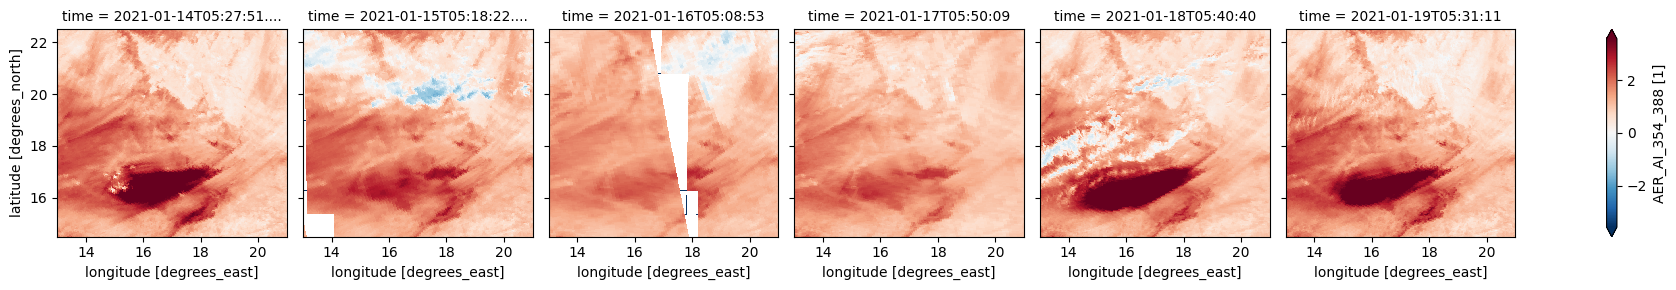

In [12]:
ds_aer_ai['AER_AI_354_388'].plot(robust=True, col="time")

#### 2. Sentinel-5P TROPOMI Level-2 Methane (CH₄) Total Column

Sentinel-5P TROPOMI Level-2 Methane (CH₄) Total Column is a satellite product from Sentinel-5 Precursor’s TROPOMI that measures the vertically integrated amount of methane in the atmosphere by analyzing reflected shortwave-infrared sunlight. It is used to detect and map methane emission hotspots, quantify regional sources from oil and gas operations, agriculture and wetlands, monitor trends in a major greenhouse gas, and support climate policy and mitigation efforts.

In [21]:
# Method 1: Specify the latitude, longitude, and buffer)
aoi = define_area(lat=30.90, lon=31, buffer=4)

# Method 2: Use a polygon as a GeoJSON or Esri Shapefile. 
# aoi = define_area(vector_path='aoi.shp')

#Create a geopolygon and geodataframe of the area of interest
geopolygon = Geometry(aoi["features"][0]["geometry"], crs="epsg:4326")
geopolygon_gdf = gpd.GeoDataFrame(geometry=[geopolygon], crs=geopolygon.crs)

# Get the latitude and longitude range of the geopolygon
lat_range = (geopolygon_gdf.total_bounds[1], geopolygon_gdf.total_bounds[3])
lon_range = (geopolygon_gdf.total_bounds[0], geopolygon_gdf.total_bounds[2])

ds_l2_ch4 = dc.load(product='s5p_tropomi_l2_ch4',
                    x= lon_range,
                    y= lat_range,
                    time = ('2023-09-5', '2023-09-12'),
                    group_by="solar_day", 
                    resolution = (-0.01, 0.01))

ds_l2_ch4

<xarray.Dataset> Size: 26MB
Dimensions:      (time: 8, latitude: 800, longitude: 800)
Coordinates:
  * time         (time) datetime64[ns] 64B 2023-09-05T04:54:25 ... 2023-09-12...
  * latitude     (latitude) float64 6kB 34.89 34.88 34.87 ... 26.92 26.91 26.9
  * longitude    (longitude) float64 6kB 27.0 27.02 27.02 ... 34.98 34.98 34.99
    spatial_ref  int32 4B 4326
Data variables:
    CH4          (time, latitude, longitude) float32 20MB -9.999e+03 ... nan
    dataMask     (time, latitude, longitude) uint8 5MB 255 255 255 255 ... 0 0 0
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

## Masking

Before visualisation, we use the `dataMask` band to mask values affected by cloud or other issues. The code below keeps data for pixels where the data mask value is 1.

In [22]:
ds_l2_ch4 = ds_l2_ch4.where(ds_l2_ch4.dataMask == 1)

#### Visualising the band

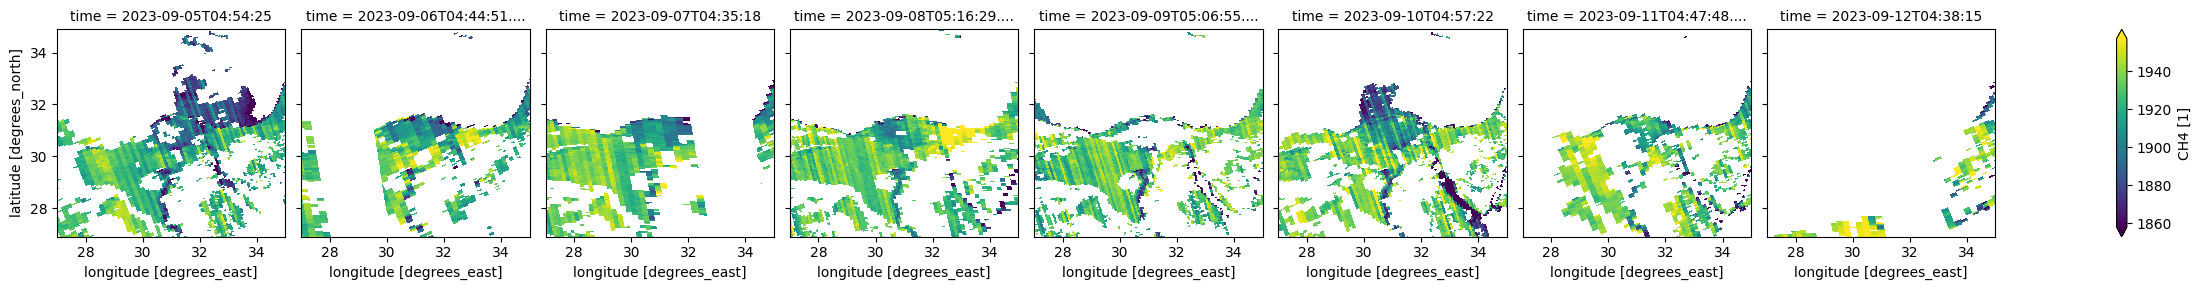

In [23]:
ds_l2_ch4['CH4'].plot(robust=True, col="time")

#### 3. Sentinel-5p TROPOMI Level 2 Cloud fraction, albedo, top pressure

Sentinel-5P TROPOMI Level-2 Cloud Fraction, Cloud Albedo, and Cloud Top Pressure are atmospheric products from Sentinel-5 Precursor’s TROPOMI that describe cloud coverage, brightness, and height for each satellite pixel, derived from reflected solar radiation measurements. These cloud parameters are used to improve the accuracy of trace-gas retrievals (by correcting for cloud contamination), to study cloud distribution and radiative effects, and to support weather and climate analysis by quantifying how clouds influence Earth’s energy balance and atmospheric structure

In [25]:
# Method 1: Specify the latitude, longitude, and buffer)
aoi = define_area(lat=30.90, lon=31, buffer=4)

# Method 2: Use a polygon as a GeoJSON or Esri Shapefile. 
# aoi = define_area(vector_path='aoi.shp')

#Create a geopolygon and geodataframe of the area of interest
geopolygon = Geometry(aoi["features"][0]["geometry"], crs="epsg:4326")
geopolygon_gdf = gpd.GeoDataFrame(geometry=[geopolygon], crs=geopolygon.crs)

# Get the latitude and longitude range of the geopolygon
lat_range = (geopolygon_gdf.total_bounds[1], geopolygon_gdf.total_bounds[3])
lon_range = (geopolygon_gdf.total_bounds[0], geopolygon_gdf.total_bounds[2])

ds_l2_cloud = dc.load(product='s5p_tropomi_l2_cloud',
                    # x= lon_range,
                    # y= lat_range,
                    # time = ('2023-09-5', '2023-09-12'),
                    group_by="solar_day", 
                    # resolution = (-0.01, 0.01))
                      **query)

ds_l2_cloud

<xarray.Dataset> Size: 96MB
Dimensions:                  (time: 6, latitude: 800, longitude: 800)
Coordinates:
  * time                     (time) datetime64[ns] 48B 2021-01-14T05:27:51.50...
  * latitude                 (latitude) float64 6kB 22.5 22.48 ... 14.52 14.51
  * longitude                (longitude) float64 6kB 13.01 13.02 ... 20.98 21.0
    spatial_ref              int32 4B 4326
Data variables:
    CLOUD_BASE_PRESSURE      (time, latitude, longitude) float32 15MB nan ......
    CLOUD_TOP_PRESSURE       (time, latitude, longitude) float32 15MB nan ......
    CLOUD_BASE_HEIGHT        (time, latitude, longitude) float32 15MB nan ......
    CLOUD_TOP_HEIGHT         (time, latitude, longitude) float32 15MB nan ......
    CLOUD_OPTICAL_THICKNESS  (time, latitude, longitude) float32 15MB nan ......
    CLOUD_FRACTION           (time, latitude, longitude) float32 15MB nan ......
    dataMask                 (time, latitude, longitude) uint8 4MB 0 0 0 ... 0 0
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

In [26]:
ds_l2_cloud = ds_l2_cloud.where(ds_l2_cloud.dataMask == 1)

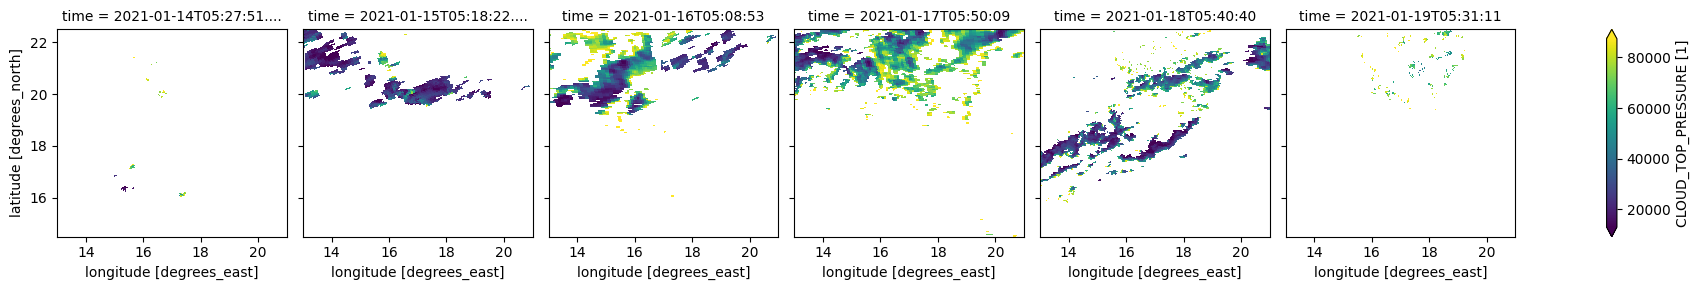

In [28]:
ds_l2_cloud['CLOUD_TOP_PRESSURE'].plot(robust=True, col="time")

####  4. Sentinel-5p TROPOMI Level 2 Carbon Monoxide (CO) total column

Sentinel-5P TROPOMI Level-2 Carbon Monoxide (CO) Total Column is an atmospheric product from Sentinel‑5 Precursor’s TROPOMI that measures the vertically integrated amount of CO in the atmosphere by analyzing reflected shortwave-infrared radiation. It is used to track combustion-related pollution from sources such as biomass burning, industry, and transport, to monitor long-range transport of pollution plumes, and to support air-quality assessment and atmospheric chemistry studies.

In [ ]:
# Method 1: Specify the latitude, longitude, and buffer)
aoi = define_area(lat=30.90, lon=31, buffer=4)

# Method 2: Use a polygon as a GeoJSON or Esri Shapefile. 
# aoi = define_area(vector_path='aoi.shp')

#Create a geopolygon and geodataframe of the area of interest
geopolygon = Geometry(aoi["features"][0]["geometry"], crs="epsg:4326")
geopolygon_gdf = gpd.GeoDataFrame(geometry=[geopolygon], crs=geopolygon.crs)

# Get the latitude and longitude range of the geopolygon
lat_range = (geopolygon_gdf.total_bounds[1], geopolygon_gdf.total_bounds[3])
lon_range = (geopolygon_gdf.total_bounds[0], geopolygon_gdf.total_bounds[2])

ds_l2_co = dc.load(product='s5p_tropomi_l2_co',
                    # x= lon_range,
                    # y= lat_range,
                    # time = ('2023-09-5', '2023-09-12'),
                    group_by="solar_day", 
                    # resolution = (-0.01, 0.01))
                      **query)

ds_l2_co

In [ ]:
ds_l2_co = ds_l2_co.where(ds_l2_co.dataMask == 1)

In [ ]:
ds_l2_co['CLOUD_TOP_PRESSURE'].plot(robust=True, col="time")

####  5. Sentinel-5p TROPOMI Level 2 Formaldehyde (HCHO) total column

Sentinel-5P TROPOMI Level-2 Formaldehyde (HCHO) Total Column is an atmospheric composition product from Sentinel‑5 Precursor’s TROPOMI that measures the vertically integrated concentration of formaldehyde in the atmosphere using ultraviolet spectral observations. It is used as a proxy for volatile organic compound (VOC) emissions to identify polluted urban areas, biomass-burning regions, and biogenic sources from vegetation, and to support studies of ozone formation and air-quality dynamics.

In [ ]:
# Method 1: Specify the latitude, longitude, and buffer)
aoi = define_area(lat=30.90, lon=31, buffer=4)

# Method 2: Use a polygon as a GeoJSON or Esri Shapefile. 
# aoi = define_area(vector_path='aoi.shp')

#Create a geopolygon and geodataframe of the area of interest
geopolygon = Geometry(aoi["features"][0]["geometry"], crs="epsg:4326")
geopolygon_gdf = gpd.GeoDataFrame(geometry=[geopolygon], crs=geopolygon.crs)

# Get the latitude and longitude range of the geopolygon
lat_range = (geopolygon_gdf.total_bounds[1], geopolygon_gdf.total_bounds[3])
lon_range = (geopolygon_gdf.total_bounds[0], geopolygon_gdf.total_bounds[2])

ds_l2_hcho = dc.load(product='s5p_tropomi_l2_hcho',
                    # x= lon_range,
                    # y= lat_range,
                    # time = ('2023-09-5', '2023-09-12'),
                    group_by="solar_day", 
                    # resolution = (-0.01, 0.01))
                      **query)

ds_l2_hcho

In [ ]:
ds_l2_hcho = ds_l2_hcho.where(ds_l2_hcho.dataMask == 1)

In [ ]:
ds_l2_hcho['CLOUD_TOP_PRESSURE'].plot(robust=True, col="time")

####  6. Sentinel-5p TROPOMI Level 2 Nitrogen Dioxide (NO2), total and tropospheric columns

Sentinel-5P TROPOMI Level-2 Nitrogen Dioxide (NO₂) Total and Tropospheric Columns are atmospheric products from Sentinel-5 Precursor’s TROPOMI that measure the vertically integrated amount of nitrogen dioxide for the entire atmosphere (total column) and specifically within the troposphere (tropospheric column) using visible and ultraviolet spectral data. These products are used to monitor surface-level air pollution from vehicles, power plants, and industry, to evaluate air-quality trends and population exposure, and to support environmental regulation and urban pollution management

In [ ]:
# Method 1: Specify the latitude, longitude, and buffer)
aoi = define_area(lat=30.90, lon=31, buffer=4)

# Method 2: Use a polygon as a GeoJSON or Esri Shapefile. 
# aoi = define_area(vector_path='aoi.shp')

#Create a geopolygon and geodataframe of the area of interest
geopolygon = Geometry(aoi["features"][0]["geometry"], crs="epsg:4326")
geopolygon_gdf = gpd.GeoDataFrame(geometry=[geopolygon], crs=geopolygon.crs)

# Get the latitude and longitude range of the geopolygon
lat_range = (geopolygon_gdf.total_bounds[1], geopolygon_gdf.total_bounds[3])
lon_range = (geopolygon_gdf.total_bounds[0], geopolygon_gdf.total_bounds[2])

ds_l2_hcho = dc.load(product='s5p_tropomi_l2_hcho',
                    # x= lon_range,
                    # y= lat_range,
                    # time = ('2023-09-5', '2023-09-12'),
                    group_by="solar_day", 
                    # resolution = (-0.01, 0.01))
                      **query)

ds_l2_hcho

####  7. Sentinel-5p TROPOMI Level 2 Ozone (O3) total column

Sentinel-5P TROPOMI Level-2 Ozone (O₃) Total Column is an atmospheric composition product from Sentinel-5 Precursor’s TROPOMI that measures the total amount of ozone throughout the atmosphere by analyzing ultraviolet and visible radiation absorbed by ozone molecules. It is used to monitor the ozone layer, assess exposure to harmful ultraviolet radiation, track long-term ozone trends, and support international environmental agreements related to atmospheric protection.

####  8. Sentinel-5p TROPOMI Level 2 Sulfur Dioxide (SO2) total column

Sentinel-5P TROPOMI Level-2 Sulfur Dioxide (SO₂) Total Column is an atmospheric product from Sentinel-5 Precursor’s TROPOMI that measures the vertically integrated amount of sulfur dioxide in the atmosphere using ultraviolet spectral observations. It is used to detect emissions from power plants, oil refineries, and smelters, to monitor volcanic eruptions in near-real-time, and to assess the contribution of sulfur pollution to air quality degradation and acid rain formation.

---

## Additional information

<b> License </b> The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0).

Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

<b> Contact </b> If you need assistance, please post a question on the [DE Africa Slack channel](https://digitalearthafrica.slack.com/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).

If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

<b> Compatible datacube version </b>

In [15]:
print(datacube.__version__)

1.8.20


**Last Tested:**

In [16]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2025-09-16'